In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-levels/test.txt
/kaggle/input/english-levels/validation.txt
/kaggle/input/english-levels/train.txt


In [2]:
!pip install datasets transformers

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import Dataset
from transformers import T5TokenizerFast

In [4]:
def read_data(path):
    with open(path, encoding="utf-8") as f:
        lines = f.read().split("\n")
    
    data = {"simple": [], "medium": [], "hard": []}
    for i in range(1, len(lines)):
        simple, medium, hard = lines[i].split("\t")
        data["simple"].append(simple)
        data["medium"].append(medium)
        data["hard"].append(hard)
    
    return data

In [5]:
def get_text_lengths(data, text_type):
    lengths = []
    for el in data:
        input_ids = tokenizer(el[text_type], return_tensors="pt").input_ids
        length = len(input_ids[0])
        lengths.append(length)
    return lengths

In [6]:
train_dct = read_data("/kaggle/input/english-levels/train.txt")
train = Dataset.from_dict(train_dct)

tokenizer = T5TokenizerFast.from_pretrained("t5-small")

In [7]:
lengths_dct = {}

for text_type in ("simple", "medium", "hard"):
    lengths_dct[text_type] = get_text_lengths(data=train, text_type=text_type)

Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors


In [8]:
df = pd.DataFrame(lengths_dct)
df.describe()

,simple,medium,hard
count,1948.000000,1948.000000,1948.000000
mean,109.636550,119.030801,174.462012
std,35.194016,34.682418,64.232957
min,28.000000,33.000000,40.000000
25%,83.000000,94.000000,132.000000
50%,104.000000,117.000000,172.000000
75%,134.000000,141.000000,205.000000
max,284.000000,294.000000,537.000000


In [9]:
os.mkdir("Illustrations")

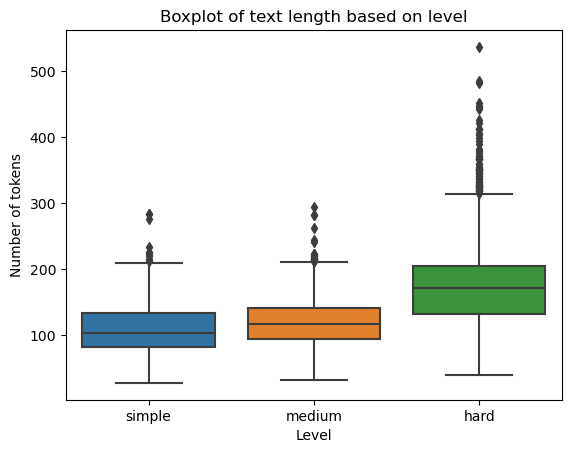

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
sns.boxplot(df)
ax.set_title("Boxplot of text length based on level")
ax.set_ylabel("Number of tokens")
ax.set_xlabel("Level")
plt.savefig(os.path.join("Illustrations", "boxplot.png"))

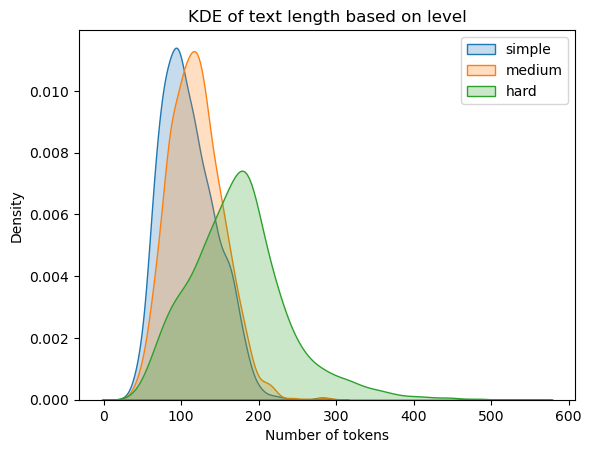

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

for level, lengths in lengths_dct.items():
    sns.kdeplot(data=lengths, label=level, fill=True, legend=True)

ax.set_title("KDE of text length based on level")
ax.set_xlabel("Number of tokens")
ax.legend()
plt.savefig(os.path.join("Illustrations", "KDE.png"))